## –õ–∏–Ω–µ–π–Ω–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
import warnings
import time
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [5]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# –°–º–æ—Ç—Ä–∏–º –Ω–∞ SVM, LR 

In [7]:
# –°–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ.
X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

In [9]:
X.shape

(10000, 10)

‚úÖ
- –û–±—É—á–∏—Ç–µ –º–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤. 
- –ü–æ–¥–±–µ—Ä–∏—Ç–µ –ø–∞—Ä–∞–º–µ—Ç—Ä —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ `C`, –ø–æ–¥–±–∏—Ä–∞–π—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è AUC-PR

In [11]:
def auc_pr(y_test, y_pred):
    precision, recall, th = precision_recall_curve(y_test, y_pred)
    return auc(recall, precision)

In [13]:
scl = StandardScaler()
X = scl.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

In [17]:
def c_best_selection(C_set, clf, X_t, y_t, X_val, y_val):
    auc_p_r = 0
    C = 1.0
    
    for C_i in C_set:
        clf.C = C_i
        
        clf.fit(X_t, y_t)
        a_x = clf.predict(X_val)
        
        precision, recall, th = precision_recall_curve(y_val, a_x)
        
        auc_precision_recall = auc(recall, precision)
        
        if auc_precision_recall > auc_p_r:
            auc_p_r = auc_precision_recall
            C = C_i
            
    print("–ü–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä –°:", C)
    return C
    

In [19]:
best_c_linearSVC = c_best_selection(np.arange(0.001, 100, 1), LinearSVC(), X_train1, y_train1, X_val,  y_val)

–ü–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä –°: 95.00099999999999


‚úÖ –ù–∞ —Ç–µ—Å—Ç–æ–≤–æ–π —á–∞—Å—Ç–∏ –ø–æ—Å—Ç—Ä–æ–π—Ç–µ ROC –∏ PR –∫—Ä–∏–≤—ã–µ, –∞ —Ç–∞–∫–∂–µ –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ AUC-ROC, AUC-PR —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ 5 –∑–Ω–∞–∫–æ–≤. –°—Ä–∞–≤–Ω–∏—Ç–µ AUC-ROC –∏ AUC-PR –¥–ª—è –≤–∞—à–µ–π –º–æ–¥–µ–ª–∏ —Å —ç—Ç–∏–º–∏ –∂–µ –º–µ—Ç—Ä–∏–∫–∞–º–∏ –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ (–∫–æ—Ç–æ—Ä—ã–π –Ω–∞ –∫–∞–∂–¥–æ–º –æ–±—ä–µ–∫—Ç–µ –≤—ã–¥–∞—ë—Ç –æ–¥–∏–Ω –∏–∑ –¥–≤—É—Ö –∫–ª–∞—Å—Å–æ–≤ —Å —Ä–∞–≤–Ω—ã–º–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—è–º–∏).

### –°—á–∏—Ç–∞–µ–º

In [21]:
clf = LinearSVC()
clf.C = best_c_linearSVC
clf.fit(X_train, y_train)
a_x = clf.predict(X_test)

In [23]:
precision, recall, th_pr = precision_recall_curve(y_test, a_x)
fpr, tpr, th_roc = roc_curve(y_test, a_x)

In [25]:
print("AUC_ROC: %0.5f" % auc(fpr, tpr))
print("AUC_PR: %0.5f"% auc(recall, precision))

AUC_ROC: 0.70742
AUC_PR: 0.78344


In [27]:
fpr

array([0.        , 0.28523264, 1.        ])

### –°—Ç—Ä–æ–∏–º

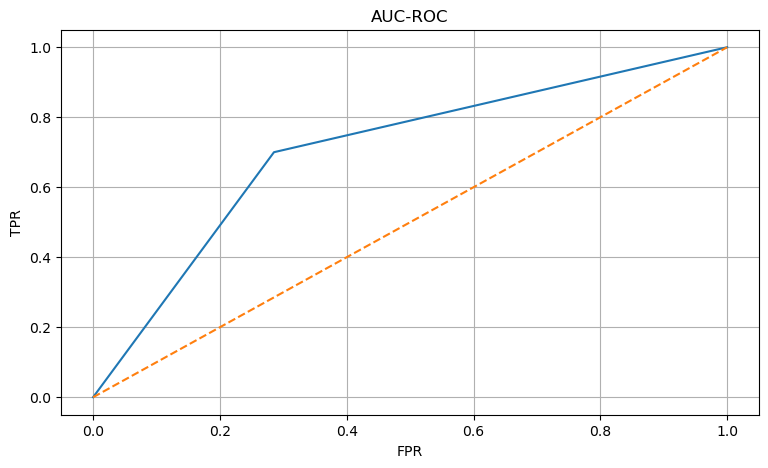

In [29]:
plt.figure(figsize=(9,5))

plt.plot(fpr, tpr, label="ROC")
plt.plot([0,1],[0,1], linestyle='--')


plt.grid(True)
plt.title('AUC-ROC')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [31]:
recall

array([1.        , 0.70006592, 0.        ])

In [33]:
precision

array([0.50566667, 0.71515152, 1.        ])

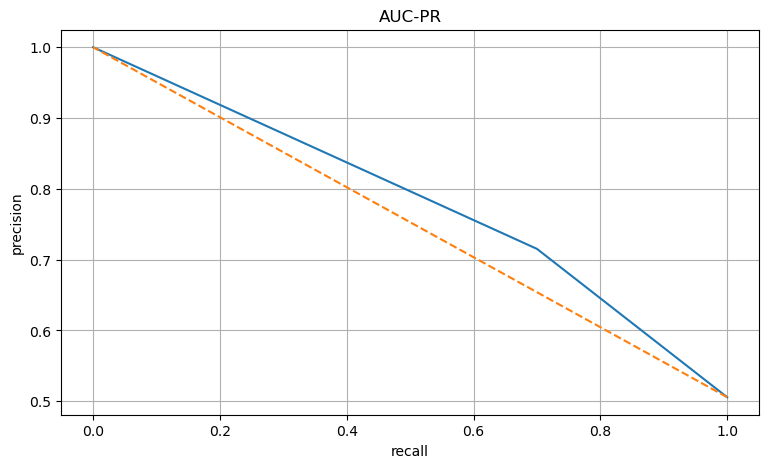

In [35]:
plt.figure(figsize=(9,5))

plt.plot(recall, precision, label="PR")
plt.plot([1, 0], [precision[0], 1], linestyle='--')

plt.grid(True)
plt.title('AUC-PR')
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

‚úÖ 
- –ü—Ä–æ–¥–µ–ª–∞–π—Ç–µ –≤—Å–µ —Ç–æ –∂–µ —Å–∞–º–æ–µ –¥–ª—è –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (LR) ‚Äî –æ–±—É—á–µ–Ω–∏–µ, –ø–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ (–∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ L2-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é), –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ –≤—Å–µ—Ö –º–µ—Ç—Ä–∏–∫ –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫—Ä–∏–≤—ã—Ö. 
- –°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã LR –∏ SVM —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –≤—Å–µ—Ö –≤—ã—á–∏—Å–ª–µ–Ω–Ω—ã—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –∫–∞—á–µ—Å—Ç–≤–∞.

In [37]:
best_c_LR = c_best_selection(np.arange(0.001, 100, 1), LogisticRegression(), X_train1, y_train1, X_val,  y_val)

–ü–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä –°: 1.001


In [39]:
clf = LogisticRegression()
clf.C = best_c_LR
clf.fit(X_train, y_train)
a_x = clf.predict(X_test)

precision, recall, th_pr = precision_recall_curve(y_test, a_x)
fpr, tpr, th_roc = roc_curve(y_test, a_x)

print("AUC_ROC: %0.5f" % auc(fpr, tpr))
print("AUC_PR: %0.5f"% auc(recall, precision))

AUC_ROC: 0.77134
AUC_PR: 0.83116


### –°—Ç—Ä–æ–∏–º

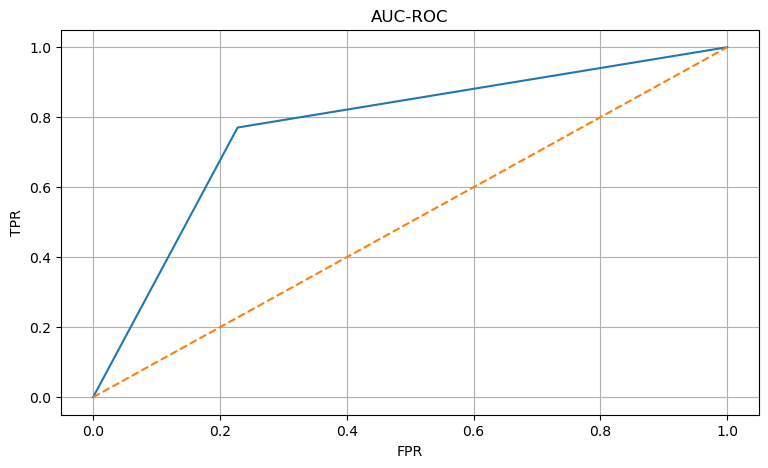

In [41]:
plt.figure(figsize=(9,5))

plt.plot(fpr, tpr, label="ROC")
plt.plot([0,1],[0,1], linestyle='--')


plt.grid(True)
plt.title('AUC-ROC')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [43]:
precision

array([0.50566667, 0.77571334, 1.        ])

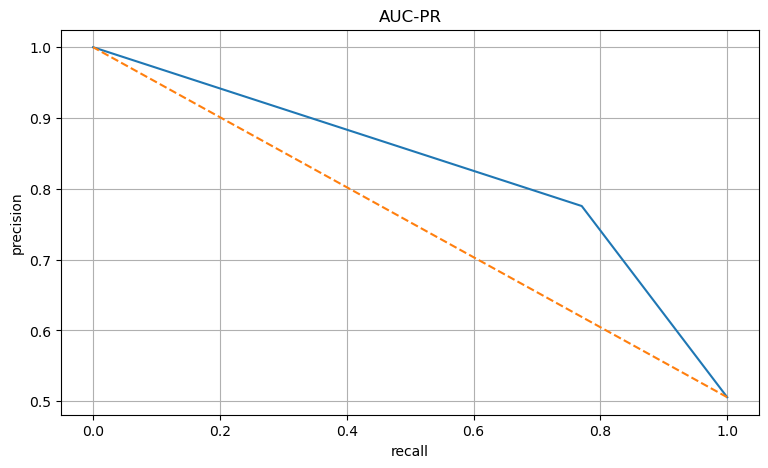

In [45]:
plt.figure(figsize=(9,5))

plt.plot(recall, precision, label="PR")
plt.plot([1, 0], [precision[0], 1], linestyle='--')

plt.grid(True)
plt.title('AUC-PR')
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

# üìå –†–∞–±–æ—Ç–∞–µ–º —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏


–ù–∞—á–Ω—ë–º —Å one-hot-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è. –î–æ–ø—É—Å—Ç–∏–º –Ω–∞—à –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ $f_j(x)$ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ –º–Ω–æ–∂–µ—Å—Ç–≤–∞ $C=\{c_1, \dots, c_m\}$. –ó–∞–º–µ–Ω–∏–º –µ–≥–æ –Ω–∞ $m$ –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ $b_1(x), \dots, b_m(x)$, –∫–∞–∂–¥—ã–π –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö —è–≤–ª—è–µ—Ç—Å—è –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–æ–º –æ–¥–Ω–æ–≥–æ –∏–∑ –≤–æ–∑–º–æ–∂–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:
$$
b_i(x) = [f_j(x) = c_i]
$$

‚úÖ –ó–∞–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

In [140]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [52]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [54]:
df.shape

(41188, 21)

‚úÖ 
 - –†–∞–∑–¥–µ–ª–∏—Ç–µ –≤—ã–±–æ—Ä–∫—É –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏ 3:1. 
 - –ó–∞—Ñ–∏–∫—Å–∏—Ä—É–π—Ç–µ `random_state=777`, –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ `stratify`.
 - –£–¥–∞–ª–∏—Ç–µ —Å—Ç–æ–ª–±–µ—Ü, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ –Ω–µ—Å–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏. 



In [56]:
df["y"].unique()

array(['no', 'yes'], dtype=object)

In [58]:
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1

In [60]:
df.shape

(41188, 21)

‚úÖ 
- –ó–∞–∫–æ–¥–∏—Ä—É–π—Ç–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø–æ–º–æ—â—å—é `OrdinalEncoder`. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ (–≤ —ç—Ç–æ–º –∑–∞–¥–∞–Ω–∏–∏ –±—É–¥–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å c `AUC-PR`) –ø—Ä–∏ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–∏ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏. –ó–∞–º–µ—Ä—å—Ç–µ –≤—Ä–µ–º—è, –ø–æ—Ç—Ä–µ–±–æ–≤–∞–≤—à–µ–µ—Å—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ (—Å —É—á–µ—Ç–æ–º –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤).

- –ü–æ—á–µ–º—É –≤ –¥–∞–Ω–Ω–æ–º –∑–∞–¥–∞–Ω–∏–∏ –º—ã –≤—ã–±—Ä–∞–ª–∏ –º–µ—Ç—Ä–∏–∫–æ–π –∏–º–µ–Ω–Ω–æ `AUC-PR`, –∞ –Ω–µ, –∫ –ø—Ä–∏–º–µ—Ä—É, `AUC-ROC`?

**–†–∞–∑–¥–µ–ª–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∏ –≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ**

In [62]:
cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']

num = ['duration', 'age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
          'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed']

### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∫ –æ–±—É—á–µ–Ω–∏—é –º–æ–¥–µ–ª–∏

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [66]:
#–¥–ª—è –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏—Å–ø–æ–ª—å–∑—É–µ–º OrdinalEncoder
enc = OrdinalEncoder()

In [68]:
#–≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ç–∞–∫–∂–µ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º
data = ColumnTransformer([
                     ('cat', enc, cat),
                     ('num', StandardScaler(), num)
                     ])


#—Å–æ–∑–¥–∞–¥–∏–º –ø–∞–π–ø–ª–∞–π–Ω —Å LogisticRegression —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –∏ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–æ–º –¥–∞–Ω–Ω—ã—Ö 
clf = Pipeline(steps=[
                   ('enc_and_st_scaler', data),
                   ('classifier', LogisticRegression())
                   ])

### –ü–µ—Ä–µ—Ö–æ–¥–∏–º –∫ –æ–±—É—á–µ–Ω–∏—é 

In [70]:
df_ = pd.DataFrame({'name': ['n', 'n', 'v', 'm', 'v', 'n']})

In [72]:
df_

name
0    n
1    n
2    v
3    m
4    v
5    n

In [74]:
enc.fit_transform(df_)

array([[1.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.]])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='y'),
                                    df['y'], test_size = 0.3,
                                    random_state=777, stratify=df['y'])

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [78]:
start_time = time.time()
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ OrdinalEncoder:', time.time()-start_time)
print('AUC-PR –Ω–∞ OrdinalEncoder = %.5f' % auc_pr(y_test,y_pred))
print('–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤', data.fit_transform(X_train).shape[1])

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ OrdinalEncoder: 0.21066617965698242
AUC-PR –Ω–∞ OrdinalEncoder = 0.96217
–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤ 20


In [80]:
model

Pipeline(steps=[('enc_and_st_scaler',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('num', StandardScaler(),
                                                  ['duration', 'age',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx',
                                                   'cons.price.idx',
                                                   'euribor3m',
                                                   'nr.employed'])])),
                ('classifier', LogisticRegression())])

‚úÖ
- –ó–∞–∫–æ–¥–∏—Ä—É–π—Ç–µ –≤—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø–æ–º–æ—â—å—é one-hot-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è. 
- –û–±—É—á–∏—Ç–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –∏ –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ (—Å —Ç–µ–º, —á—Ç–æ –±—ã–ª–æ –¥–æ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è). 
- –ò–∑–º–µ—Ä—å—Ç–µ –≤—Ä–µ–º—è, –ø–æ—Ç—Ä–µ–±–æ–≤–∞–≤—à–µ–µ—Å—è –Ω–∞ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏.



In [82]:
#–¥–ª—è –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏—Å–ø–æ–ª—å–∑—É–µ–º OneHotEncoder
enc = OneHotEncoder(handle_unknown="ignore")

#–≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ç–∞–∫–∂–µ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º
data = ColumnTransformer([
                     ('cat', enc, cat),
                     ('num', StandardScaler(), num)
                     ])


#—Å–æ–∑–¥–∞–¥–∏–º –ø–∞–π–ø–ª–∞–π–Ω —Å LogisticRegression —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –∏ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–æ–º –¥–∞–Ω–Ω—ã—Ö 
clf = Pipeline(steps=[
                   ('enc_and_st_scaler', data),
                   ('classifier', LogisticRegression())
                   ])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='y'),
                                    df['y'], test_size = 0.3,
                                    random_state=777, stratify=df['y'])

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [86]:
start_time = time.time()
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ OHE:', time.time()-start_time)
print('AUC-PR –Ω–∞ OHE = %.5f' % auc_pr(y_test,y_pred))
print('–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤', data.fit_transform(X_train).shape[1])

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ OHE: 0.31166696548461914
AUC-PR –Ω–∞ OHE = 0.96288
–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤ 63


–ö–∞–∫ –º–æ–∂–Ω–æ –±—ã–ª–æ –∑–∞–º–µ–Ω–∏—Ç—å, one-hot-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–∂–µ—Ç —Å–∏–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —á—Ç–æ —Å–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è –Ω–∞ –ø–∞–º—è—Ç–∏, –æ—Å–æ–±–µ–Ω–Ω–æ, –µ—Å–ª–∏ –Ω–µ–∫–æ—Ç–æ—Ä—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –∏–º–µ–µ—Ç –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π. –≠—Ç—É –ø—Ä–æ–±–ª–µ–º—É —Ä–µ—à–∞–µ—Ç –¥—Ä—É–≥–æ–π —Å–ø–æ—Å–æ–± –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ ‚Äî mean-target encoding (–¥–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã –±—É–¥–µ–º –Ω–∞–∑—ã–≤–∞—Ç—å —ç—Ç–æ —Å—á—ë—Ç—á–∏–∫–∞–º–∏). –û—Å–Ω–æ–≤–Ω–∞—è –∏–¥–µ—è –≤ —Ç–æ–º, —á—Ç–æ –Ω–∞–º –≤–∞–∂–Ω—ã –Ω–µ —Å–∞–º–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –∞ –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –∫–æ—Ç–æ—Ä—ã–µ –∏–º–µ—é—Ç –æ–±—ä–µ–∫—Ç—ã —ç—Ç–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏. –ö–∞–∂–¥—ã–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –º—ã –∑–∞–º–µ–Ω–∏–º —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø–æ –≤—Å–µ–º –æ–±—ä–µ–∫—Ç–∞–º —ç—Ç–æ–π –∂–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏. –ú–µ—Ç–æ–¥ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Å—Ä–µ–¥–Ω–∏–º –∞—Ä–∏—Ñ–º–µ—Ç–∏—á–µ—Å–∫–∏–º –æ—Ç —Å—É–º–º—ã —Ü–µ–ª–µ–≤—ã—Ö –º–µ—Ç–æ–∫
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$



‚úÖ 
- –ó–∞–∫–æ–¥–∏—Ä—É–π—Ç–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –ø–æ–º–æ—â—å—é —Å—á—ë—Ç—á–∏–∫–æ–≤:

$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

- –û–±—É—á–∏—Ç–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –∏ –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. 
- –°—Ä–∞–≤–Ω–∏—Ç–µ —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–º–∏

In [88]:
#–≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ç–∞–∫–∂–µ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º, –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –æ—Ç–¥–µ–ª—å–Ω–æ
data = ColumnTransformer([
                     ('cat', 'passthrough', cat),
                     ('num', StandardScaler(), num)
                     ])


#—Å–æ–∑–¥–∞–¥–∏–º –ø–∞–π–ø–ª–∞–π–Ω —Å LogisticRegression —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –∏ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–æ–º –¥–∞–Ω–Ω—ã—Ö 
clf = Pipeline(steps=[
                   ('enc_and_st_scaler', data),
                   ('classifier', LogisticRegression())
                   ])

### –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö, –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ

In [90]:
start_time = time.time()

for col in cat:
    for categ in list(pd.unique(X_train[col])):
        g_train = X_train[(X_train[col] == categ) & (y_train == 1)].shape[0] / X_train[X_train[col] == categ].shape[0]
        X_train.loc[X_train[col] == categ, col] = g_train
        
        
        g_test = X_test[(X_test[col] == categ) & (y_test == 1)].shape[0] / X_test[X_test[col] == categ].shape[0]
        X_test.loc[X_test[col] == categ, col] = g_test 

#–æ–±—É—á–µ–Ω–∏–µ, —Ç–µ—Å—Ç–∏—Ä–æ–≤–Ω–∏–µ        
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR –ø—Ä–∏ mean-target encoding = %.5f" %  auc_pr(y_test, y_pred))
print('–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤ ', X_train.shape[1])

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 0.5512347221374512
AUC-PR –ø—Ä–∏ mean-target encoding = 0.96173
–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤  20


‚úÖ
- –†–µ–∞–ª–∏–∑—É–π—Ç–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ —Å—á—ë—Ç—á–∏–∫–æ–≤ —Å–∞–º—ã–º –ø—Ä–æ—Å—Ç—ã–º —Å–ø–æ—Å–æ–±–æ–º ‚Äî –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ —à—É–º–∞ –∫ –∑–Ω–∞—á–µ–Ω–∏—è–º . 
- –°–Ω–æ–≤–∞ –æ–±—É—á–∏—Ç–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é, –æ—Ü–µ–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ. 
- –°–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã.


In [92]:
start_time = time.time()
for col in cat:
    #–¥–æ–±–∞–≤–∏–º —à—É–º–∞ –∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º
    X_train[col] += np.random.rand(X_train.shape[0]) * np.sign(np.random.rand(X_train.shape[0]) - 0.5) / 10
    X_test[col] += np.random.rand(X_test.shape[0]) * np.sign(np.random.rand(X_test.shape[0]) - 0.5) / 10

clf = LogisticRegression()
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR –ø—Ä–∏ mean-target encoding –∏ —à—É–º–µ= %.5f" %  auc_pr(y_test, y_pred))
print('–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤ ', X_train.shape[1])

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 0.20413804054260254
AUC-PR –ø—Ä–∏ mean-target encoding –∏ —à—É–º–µ= 0.96174
–ö–æ–ª-–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤  20


‚úÖ –î–æ–±–∞–≤—å—Ç–µ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ, –∞ –∑–∞—Ç–µ–º –ø–æ–≤—Ç–æ—Ä–∏—Ç–µ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã.

$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$

In [94]:
#—Ä–∞–∑–¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'y'), 
                                                    df['y'], test_size=0.3, random_state=777, stratify = df['y'])

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [96]:
#–≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ç–∞–∫–∂–µ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º, –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –æ—Ç–¥–µ–ª—å–Ω–æ
date = ColumnTransformer([
                     ('cat', 'passthrough', cat),
                     ('num', StandardScaler(), num)
                     ])


#—Å–æ–∑–¥–∞–¥–∏–º –ø–∞–π–ø–ª–∞–π–Ω —Å LogisticRegression —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –∏ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–æ–º –¥–∞–Ω–Ω—ã—Ö 
clf = Pipeline(steps=[
                   ('enc_and_st_scaler', date),
                   ('classifier', LogisticRegression())
                   ])

In [98]:
start_time = time.time()

C = 100

for col in cat:
    for categ in list(pd.unique(X_train[col])):
        g_new = X_train[(X_train[col] == categ) & (y_train == 1)].shape[0]
        #–¥–æ–±–∞–≤–ª—è–µ–º –¥–æ–ª—é –æ–±—ä–µ–∫—Ç–æ–≤ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ (global_mean)
        g_new += C * (y_train[y_train == 1].shape[0] / X_train.shape[0])
        g_new /= X_train[X_train[col] == categ].shape[0] + C
        X_train.loc[X_train[col] == categ, col] = g_new

        g_new_test = X_test[(X_test[col] == categ) & (y_test == 1)].shape[0]
        #–¥–æ–±–∞–≤–ª—è–µ–º –¥–æ–ª—é –æ–±—ä–µ–∫—Ç–æ–≤ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ (global_mean)
        g_new_test += C * (y_test[y_test == 1].shape[0] / y_train.shape[0])
        g_new_test /= C + X_test[X_test[col] == categ].shape[0]
        X_test.loc[X_test[col] == categ, col] = g_new_test 
        
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR –ø—Ä–∏ global mean = %.5f" %  auc_pr(y_test, y_pred))

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 0.5515968799591064
AUC-PR –ø—Ä–∏ global mean = 0.96447


‚úÖ –í –¥–∞–Ω–Ω—ã—Ö –∏–º–µ–µ—Ç—Å—è –ø—Ä–∏–∑–Ω–∞–∫ "–≤–æ–∑—Ä–∞—Å—Ç –∫–ª–∏–µ–Ω—Ç–∞". –°–µ–π—á–∞—Å –º—ã –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º –µ–≥–æ –∫–∞–∫ —á–∏—Å–ª–æ–≤–æ–π, —á—Ç–æ –≤ –æ–±—â–µ–º —Å–ª—É—á–∞–µ –¥–ª—è –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏ –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ–≤–µ—Ä–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑–æ–π. –¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, —É —ç—Ç–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –µ—Å—Ç—å –¥–æ–≤–æ–ª—å–Ω–æ –º–Ω–æ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π (—Å–∫–æ–ª—å–∫–æ?), –ø–æ—ç—Ç–æ–º—É –ø—Ä–∏–º–µ–Ω—è—Ç—å –∫ –Ω–µ–º—É one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–∂–µ—Ç –æ–∫–∞–∑–∞—Ç—å—Å—è –∏–∑–ª–∏—à–Ω–∏–º. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å –≤–æ–∑—Ä–∞—Å—Ç —Å –ø–æ–º–æ—â—å—é —Å—á–µ—Ç—á–∏–∫–æ–≤. –°—Ç–∞–ª–æ –ª–∏ –ª—É—á—à–µ?



In [100]:
#—Ä–∞–∑–¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'y'), 
                                                    df['y'], test_size=0.3, random_state=777, stratify = df['y'])

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [102]:
print('–ö–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≤–æ–∑—Ä–∞—Å—Ç–æ–≤', df['age'].nunique())

–ö–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≤–æ–∑—Ä–∞—Å—Ç–æ–≤ 78


In [104]:
#—Ç–µ–ø–µ—Ä—å –≤–æ–∑—Ä–∞—Å—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'age']

num = ['campaign', 'pdays', 'previous', 'emp.var.rate',
          'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed', 'duration']

In [106]:
start_time = time.time()

C = 100

for col in cat:
    for categ in list(pd.unique(X_train[col])):
        g_new = X_train[(X_train[col] == categ) & (y_train == 1)].shape[0]
        #–¥–æ–±–∞–≤–ª—è–µ–º –¥–æ–ª—é –æ–±—ä–µ–∫—Ç–æ–≤ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞
        g_new += C * (y_train[y_train == 1].shape[0] / X_train.shape[0])
        g_new /= X_train[X_train[col] == categ].shape[0] + C
        X_train.loc[X_train[col] == categ, col] = g_new

        g_new_test = X_test[(X_test[col] == categ) & (y_test == 1)].shape[0]
        #–¥–æ–±–∞–≤–ª—è–µ–º –¥–æ–ª—é –æ–±—ä–µ–∫—Ç–æ–≤ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞
        g_new_test += C * (y_test[y_test == 1].shape[0] / y_train.shape[0])
        g_new_test /= C + X_test[X_test[col] == categ].shape[0]
        X_test.loc[X_test[col] == categ, col] = g_new_test 
        
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR –ø—Ä–∏ global mean = %.5f" %  auc_pr(y_test, y_pred))

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 0.6234219074249268
AUC-PR –ø—Ä–∏ global mean = 0.97328


**–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ AUC_PR —Å—Ç–∞–ª–∞ –≤—ã—à–µ**

**–î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ**

‚úÖ –ú–æ–∂–Ω–æ –ø–æ–π—Ç–∏ –∏ –≤ –æ–±—Ä–∞—Ç–Ω—É—é —Å—Ç–æ—Ä–æ–Ω—É. –£ –Ω–∞—Å –µ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ "–º–µ—Å—è—Ü –∏ –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏" –¥–ª—è –∑–≤–æ–Ω–∫–∞. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –∏—Ö –∫–∞–∫ —á–∏—Å–ª–æ–≤—ã–µ (–º–µ—Å—è—Ü –æ—Ç 0 –¥–æ 12, –¥–Ω–∏ –Ω–µ–¥–µ–ª–∏ –æ—Ç 0 –¥–æ 4). –°—Ç–∞–ª–æ –ª–∏ –ª—É—á—à–µ –≤ —ç—Ç–æ—Ç —Ä–∞–∑?

In [116]:
X = df

In [114]:
X['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [122]:
X['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [126]:
month_map = {'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'oct' : 10, 'nov' : 11, 'dec' : 12, 'mar' : 3, 'apr' : 4,
       'sep' : 9}
day_map = {'mon' : 1, 'tue' : 2, 'wed' : 3, 'thu' : 4, 'fri' : 5}

In [128]:
X['month'] = X['month'].map(month_map).astype(int)
X['day_of_week'] = X['day_of_week'].map(day_map).astype(int)

In [132]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [134]:
cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'poutcome', 'age']

num = ['campaign', 'pdays', 'previous', 'emp.var.rate', 'month', 'day_of_week',
          'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed']

In [142]:
X_x = X.drop('y', axis = 1)

In [144]:
X_y = X['y']

0        1
1        1
2        1
3        1
4        1
        ..
41183    0
41184    1
41185    1
41186    0
41187    1
Name: y, Length: 41188, dtype: object

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_x, 
                                                    X_y, test_size=0.3, random_state=777, stratify = X['y'])

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [152]:
start_time = time.time()

C = 100

for col in cat:
    for categ in list(pd.unique(X_train[col])):
        g_new = X_train[(X_train[col] == categ) & (y_train == 1)].shape[0]
        #–¥–æ–±–∞–≤–ª—è–µ–º –¥–æ–ª—é –æ–±—ä–µ–∫—Ç–æ–≤ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞
        g_new += C * (y_train[y_train == 1].shape[0] / X_train.shape[0])
        g_new /= X_train[X_train[col] == categ].shape[0] + C
        X_train.loc[X_train[col] == categ, col] = g_new

        g_new_test = X_test[(X_test[col] == categ) & (y_test == 1)].shape[0]
        #–¥–æ–±–∞–≤–ª—è–µ–º –¥–æ–ª—é –æ–±—ä–µ–∫—Ç–æ–≤ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞
        g_new_test += C * (y_test[y_test == 1].shape[0] / y_train.shape[0])
        g_new_test /= C + X_test[X_test[col] == categ].shape[0]
        X_test.loc[X_test[col] == categ, col] = g_new_test 
        
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR –ø—Ä–∏ global mean = %.5f" %  auc_pr(y_test, y_pred))

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 0.5534908771514893
AUC-PR –ø—Ä–∏ global mean = 0.97284


# üìå –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–í–∞–∂–Ω–æ–π —á–∞—Å—Ç—å—é –ø—Ä–æ—Ü–µ—Å—Å–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ —è–≤–ª—è–µ—Ç—Å—è –æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ù–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –º–Ω–æ–≥–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –æ–∫–∞–∑—ã–≤–∞—é—Ç –º–∞–ª–æ–µ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ –º–æ–¥–µ–ª—å (–ø—Ä–∏ —ç—Ç–æ–º –∏—Ö —Ä–∞—Å—á—ë—Ç –∑–∞–Ω–∏–º–∞–µ—Ç –≤—Ä–µ–º—è) –∏–ª–∏ –¥–∞–∂–µ –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ —Å–∫–∞–∑—ã–≤–∞—é—Ç—Å—è –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–µ –º–æ–¥–µ–ª–∏. –ü–æ–ø—Ä–æ–±—É–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–æ–¥—Ö–æ–¥–æ–≤ –æ—Ç–±–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –æ—Ü–µ–Ω–∏–º, –∫–∞–∫ –æ–Ω–∏ –≤–ª–∏—è—é—Ç –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –∏ —Å–∫–æ–ª—å–∫–æ –≤—Ä–µ–º–µ–Ω–∏ –∑–∞–Ω–∏–º–∞—é—Ç.

–û–±—Ä–∞—Ç–∏–º—Å—è –∫ —Ç–µ–º –∂–µ –¥–∞–Ω–Ω—ã–º –ø—Ä–æ –±–∞–Ω–∫–æ–≤—Å–∫–∏–π —Ç–µ–ª–µ—Ñ–æ–Ω–Ω—ã–π –º–∞—Ä–∫–µ—Ç–∏–Ω–≥.

In [154]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

#—É–¥–∞–ª–∏–ª–∏ —Ü–µ–ª–µ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü –∏ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
X = df.drop(columns=['duration', 'y'])

#–æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ —Å—Ç–æ–ª–±–µ—Ü —Ç–∞—Ä–≥–µ—Ç–∞
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#—Ä–∞–∑–¥–µ–ª–∏–ª–∏ –≤—ã–±–æ—Ä–∫—É –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777, stratify = y)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [156]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0           1.1          93.994          -36.4      4.857       5191.0  1  
1           1.1          93.994          -36.4      4.857       5191.0  1  
2           1.1          93.994          -36.4      4.857       5191.0  1  
3           1.1          93.994          -36.4      4.857       5191.0  1  
4           1.1          93.994          -36.4      4.857       5191.0  1

‚úÖ –í –¥–∞–Ω–Ω—ã—Ö –º–Ω–æ–≥–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (—Å–µ–π—á–∞—Å –¥–∞–≤–∞–π—Ç–µ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –≤–æ–∑—Ä–∞—Å—Ç –∫–∞–∫ —á–∏—Å–ª–æ–≤–æ–π). –î–∞–≤–∞–π—Ç–µ –∑–∞–∫–æ–¥–∏—Ä—É–µ–º –∏—Ö —Å –ø–æ–º–æ—â—å—é one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è. –ò—Å—Ö–æ–¥–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å. –°–∫–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º—ã –ø–æ–ª—É—á–∏–ª–∏?

### –í—Å–ø–æ–º–Ω–∏–º –∫–∞–∫ –±—ã–ª–∏ —Ä–∞–∑–¥–µ–ª–µ–Ω—ã –ø—Ä–∏–∑–Ω–∞–∫–∏ (–Ω–∞ –≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ)

In [158]:
cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']

num = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
          'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed', 'duration']

### –ó–∞–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø–æ–º–æ—â—å—é one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è

**–ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç–æ–¥ get_dummies**

In [160]:
#–¥–ª—è –∫—Ä–∞—Å–∏–≤–æ–≥–æ –≤—ã–≤–æ–¥–∞ –Ω–∞–∑–≤–∞–Ω–∏–π —Å—Ç–æ–ª–±—Ü–æ–≤
cat_mask = X_train.select_dtypes(include=['object']).columns
cat_mask = X_test.select_dtypes(include=['object']).columns

#drop_first = True –¥–∞—Å—Ç k-1 —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ —Å k –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ -> –∏–∑–±–µ–∂–∏–º –ø–æ–ø–∞–¥–µ–Ω–∏—è –≤ –¥–∞–º–º–∏-—Ç—Ä—ç–ø
X_train = pd.get_dummies(X_train, columns = cat_mask, drop_first=True)
X_test = pd.get_dummies(X_test, columns = cat_mask, drop_first=True)

In [162]:
X_train.shape

(28831, 52)

‚úÖ –í –∫–∞—á–µ—Å—Ç–≤–µ –æ—Å–Ω–æ–≤–Ω–æ–π –º–æ–¥–µ–ª–∏ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é, –∞ —Ü–µ–ª–µ–≤–æ–π –º–µ—Ç—Ä–∏–∫–∏ ‚Äî `AUC-PR`. –û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å –∏ –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. 

In [164]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
a_x = clf.predict(X_test)

auc_pr_lr_ohe = auc_pr(y_test, a_x)

In [166]:
print("AUC_PR = %.5f" % auc_pr_lr_ohe)

AUC_PR = 0.95226


### –í—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ –º–µ—Ç–æ–¥—ã

–î–æ–ø—É—Å—Ç–∏–º, –º—ã —Ö–æ—Ç–∏–º –æ—Å—Ç–∞–≤–∏—Ç—å —Ç–æ–ª—å–∫–æ 40 –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ü–æ–ø—Ä–æ–±—É–µ–º —Å–¥–µ–ª–∞—Ç—å —ç—Ç–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ —Å–ø–æ—Å–æ–±–∞–º–∏.

–ù–∞—á–Ω—ë–º —Å –æ—Ç–±–æ—Ä–∞–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏. –ö–∞–∫ –∏–∑–≤–µ—Å—Ç–Ω–æ, –≤–µ—Å–∞ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏ –æ–∑–Ω–∞—á–∞—é—Ç –≤–∫–ª–∞–¥ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏, –∞ –∑–Ω–∞—á–∏—Ç, –º–æ–¥—É–ª—å —ç—Ç–æ–≥–æ –≤–∫–ª–∞–¥–∞ –º–æ–∂–Ω–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –∫–∞–∫ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –¢–∞–∫–æ–π –º–µ—Ç–æ–¥ –æ—Ç–±–æ—Ä–∞ –Ω–∞–∑—ã–≤–∞—é—Ç—Å—è –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–º –∏–ª–∏ embedded method, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –∑–∞–ª–æ–∂–µ–Ω –≤ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏.





‚úÖ 
 - –û—Å—Ç–∞–≤—å—Ç–µ 40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –º–æ–¥—É–ª–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏. –û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª–∏ –∑–∞–Ω–æ–≤–æ –∏ –æ—Ü–µ–Ω–∏—Ç–µ –µ—ë –∫–∞—á–µ—Å—Ç–≤–æ. –ó–∞–º–µ—Ä—å—Ç–µ —Å–∫–æ—Ä–æ—Å—Ç—å —Ç–∞–∫–æ–≥–æ –æ—Ç–±–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

–ò–∑–º–µ–Ω–∏–ª–æ—Å—å –ª–∏ –∫–∞—á–µ—Å—Ç–≤–æ? 

In [168]:
start_time = time.time()

indices = pd.DataFrame(clf.coef_[0], [*range(52)]).sort_values(by=0).tail(40).index

x_train = X_train.iloc[:, indices.values]
x_test = X_test.iloc[:, indices.values]

clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
a_x = clf1.predict(x_test)

auc_pr_lr_fourty = auc_pr(y_test, a_x)

print('–í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏', time.time()-start_time)
print("AUC_PR = %.5f" % auc_pr_lr_fourty)

–í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ 0.22800087928771973
AUC_PR = 0.95208


In [170]:
indices

Index([ 1, 48, 44, 37, 51, 29, 45, 38, 17, 18,  0, 14, 11, 22, 33, 26, 31, 12,
       19,  2, 23, 10, 34, 32,  8, 27, 35, 25, 43, 15, 24, 20, 46,  3, 30,  9,
       36,  4,  7, 42],
      dtype='int64')

### –û—Ç–º–∞—Å—à–∞–±–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø–æ–º–æ—â—å—é StandartScaler –∏ OHE

**–°–Ω–æ–≤–∞ —Ä–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ**

In [172]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

#—É–¥–∞–ª–∏–ª–∏ —Ü–µ–ª–µ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü –∏ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
X = df.drop(columns=['y'])

#–æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ —Å—Ç–æ–ª–±–µ—Ü —Ç–∞—Ä–≥–µ—Ç–∞
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#—Ä–∞–∑–¥–µ–ª–∏–ª–∏ –≤—ã–±–æ—Ä–∫—É –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777, stratify=y)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

### –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ

In [174]:
#–≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º —Å –ø–æ–º–æ—â—å—é StandardScaler, –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–æ–∫–∞ –Ω–µ —Ç—Ä–æ–≥–∞–µ–º
date = ColumnTransformer([
                     ('cat', 'passthrough', cat),
                     ('num', StandardScaler(), num)
                     ])

X_train = pd.DataFrame(date.fit_transform(X_train))
X_test = pd.DataFrame(date.transform(X_test))

In [176]:
#–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
cat_mask = X_train.select_dtypes(include=['object']).columns
cat_mask = X_test.select_dtypes(include=['object']).columns

#drop_first = True –¥–∞—Å—Ç k-1 —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ —Å k –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ -> –∏–∑–±–µ–∂–∏–º –ø–æ–ø–∞–¥–µ–Ω–∏—è –≤ –¥–∞–º–º–∏-—Ç—Ä—ç–ø
X_train = pd.get_dummies(data=X_train, columns=X_train.iloc[:, 0:10].columns, drop_first=True)
X_test = pd.get_dummies(data=X_test, columns=X_test.iloc[:, 0:10].columns, drop_first=True)

In [178]:
X_train

10        11        12        13        14        15        16  \
0     -0.289536 -0.567466  0.196418 -0.351015 -2.213588  2.249459 -1.599578   
1     -0.958139 -0.567466  0.196418  1.665344 -1.131825  0.477886  0.781528   
2       1.62076 -0.203565  0.196418 -0.351015 -0.113695 -0.321482 -0.647481   
3      0.570097 -0.567466  0.196418  1.665344 -1.195458 -1.228873  -1.17796   
4       1.42973 -0.203565  0.196418 -0.351015  0.840802 -0.278273  1.538367   
...         ...       ...       ...       ...       ...       ...       ...   
28826   1.42973 -0.203565  0.196418 -0.351015  0.840802 -0.278273  1.538367   
28827  -0.76711 -0.567466  0.196418 -0.351015  0.840802  0.953186 -0.225863   
28828 -0.480565  0.160335  0.196418 -0.351015  0.840802 -0.472714  0.593182   
28829  0.761127 -0.567466  0.196418 -0.351015 -1.195458 -1.228873  -1.17796   
28830  -0.57608 -0.203565  0.196418 -0.351015 -1.195458 -1.228873  -1.17796   

             17        18        19  0_blue-collar  0_entrepreneur  \
0     -1.669748 -2.061837 -0.035962          False           False   
1     -1.563255 -2.419431 -0.392675          False           False   
2      0.233315  0.399899 -0.477976           True           False   
3     -1.352571  -0.93521 -0.291865          False           False   
4      0.719154  0.845855  1.247428          False            True   
...         ...       ...       ...            ...             ...   
28826  0.718579  0.845855 -0.160036          False           False   
28827  0.778445  0.845855  0.130762          False           False   
28828  0.774991  0.845855  -0.29962          False            True   
28829 -1.313427  -0.93521 -0.536136          False            True   
28830 -1.333575  -0.93521  0.933366           True           False   

       0_housemaid  0_management  0_retired  0_self-employed  0_services  \
0            False         False      False            False       False   
1            False         False      False            False       False   
2            False         False      False            False       False   
3            False         False      False            False        True   
4            False         False      False            False       False   
...            ...           ...        ...              ...         ...   
28826        False         False      False            False       False   
28827         True         False      False            False       False   
28828        False         False      False            False       False   
28829        False         False      False            False       False   
28830        False         False      False            False       False   

       0_student  0_technician  0_unemployed  0_unknown  1_married  1_single  \
0          False         False         False      False      False      True   
1          False         False         False      False      False      True   
2          False         False         False      False       True     False   
3          False         False         False      False       True     False   
4          False         False         False      False      False     False   
...          ...           ...           ...        ...        ...       ...   
28826      False         False         False       True       True     False   
28827      False         False         False      False       True     False   
28828      False         False         False      False      False      True   
28829      False         False         False      False       True     False   
28830      False         False         False      False      False      True   

       1_unknown  2_basic.6y  2_basic.9y  2_high.school  2_illiterate  \
0          False       False       False           True         False   
1          False       False       False          False         False   
2          False       False        True          False         False   
3          False       False       False           True  

**–¢–µ–ø–µ—Ä—å –≤—ã–±–µ—Ä–µ–º 40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –º–æ–¥—É–ª–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏. –û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å, –æ—Ü–µ–Ω–∏–º –µ—ë –∫–∞—á–µ—Å—Ç–≤–æ.**

In [180]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [182]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [184]:
start_time = time.time()

indices = pd.DataFrame(clf.coef_[0], [*range(53)]).sort_values(by=0).tail(40).index #–í—ã–±—Ä–∞–ª–∏ 40 –ª—É—á—à–∏—Ö –≤–µ—Å–æ–≤

x_train = X_train.iloc[:, indices.values] #–≤—ã–±—Ä–∞–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ª—É—á—à–∏–º –≤–µ—Å–∞–º
x_test = X_test.iloc[:, indices.values]

clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
a_x = clf1.predict(x_test)

auc_pr_lr_fourty = auc_pr(y_test,a_x)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR (40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) = %.5f" %  auc_pr_lr_fourty)
print('indices =', indices)

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 0.19983410835266113
AUC-PR (40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) = 0.95316
indices = Index([17, 49,  8, 22, 23, 29, 12, 30,  5, 48, 19, 40, 21,  0, 18, 45, 34, 25,
       13, 26, 32, 28,  3, 20, 36, 11, 33, 35,  1, 15, 16,  2, 47, 10, 31, 41,
       44, 43, 37,  4],
      dtype='int64')


**–î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ**

‚úÖ one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –Ω–∞–º –µ–¥–∏–Ω–∏—á–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏-–∏–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ —Ç–∞–∫–∂–µ –æ—Ç—Å–∫–∞–ª–∏—Ä–æ–≤–∞—Ç—å –∏—Ö, –∫–∞–∫ –∏ –æ–±—ã—á–Ω—ã–µ —á–∏—Å–ª–æ–≤—ã–µ, –∏ —Å–Ω–æ–≤–∞ –≤—ã–±—Ä–∞—Ç—å 40 –≥–ª–∞–≤–Ω—ã—Ö –ø–æ –≤–∫–ª–∞–¥—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ò–∑–º–µ–Ω–∏–ª—Å—è –ª–∏ –∏—Ö —Å–ø–∏—Å–æ–∫? –ò–∑–º–µ–Ω–∏—Ç—Å—è –ª–∏ –∫–∞—á–µ—Å—Ç–≤–æ?

In [186]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

#—É–¥–∞–ª–∏–ª–∏ —Ü–µ–ª–µ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü –∏ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
X = df.drop(columns=['duration', 'y'])

#–æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ —Å—Ç–æ–ª–±–µ—Ü —Ç–∞—Ä–≥–µ—Ç–∞
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#—Ä–∞–∑–¥–µ–ª–∏–ª–∏ –≤—ã–±–æ—Ä–∫—É –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777, stratify=y)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [202]:
X = pd.get_dummies(X, drop_first=True)

In [206]:
num = X.columns

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777, stratify=y)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [222]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [226]:
start_time = time.time()

indices = pd.DataFrame(clf.coef_[0], [*range(53)]).sort_values(by=0).tail(40).index #–í—ã–±—Ä–∞–ª–∏ 40 –ª—É—á—à–∏—Ö –≤–µ—Å–æ–≤

x_train = X_train.iloc[:, indices.values] #–≤—ã–±—Ä–∞–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ª—É—á—à–∏–º –≤–µ—Å–∞–º
x_test = X_test.iloc[:, indices.values]

clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
a_x = clf1.predict(x_test)

auc_pr_lr_fourty = auc_pr(y_test,a_x)

print('–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:', time.time() - start_time)
print("AUC-PR (40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) = %.5f" %  auc_pr_lr_fourty)
print('indices =', indices)

–í—Ä–µ–º—è –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: 0.0745999813079834
AUC-PR (40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) = 0.94368
indices = Index([17, 49,  8, 22, 23, 29, 12, 30,  5, 48, 19, 40, 21,  0, 18, 45, 34, 25,
       13, 26, 32, 28,  3, 20, 36, 11, 33, 35,  1, 15, 16,  2, 47, 10, 31, 41,
       44, 43, 37,  4],
      dtype='int64')


**–î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ**

### –ú–µ—Ç–æ–¥—ã —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏


–î–∞–≤–∞–π—Ç–µ –æ—Ç–±–∏—Ä–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ —É–º–Ω–µ–µ, –∞ –∏–º–µ–Ω–Ω–æ —á–µ—Ä–µ–∑ –ø–æ–¥—Å—á—ë—Ç –Ω–µ–∫–æ—Ç–æ—Ä–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞. –ù–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –∑–Ω–∞—á–µ–Ω–∏–π —ç—Ç–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –±—É–¥–µ–º –æ—Å—Ç–∞–≤–ª—è—Ç—å –Ω–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏. –ú–µ—Ç–æ–¥—ã —ç—Ç–æ–≥–æ —Å–µ–º–µ–π—Å—Ç–≤–∞ –Ω–∞–∑—ã–≤–∞—é—Ç —Ñ–∏–ª—å—Ç—Ä—É—é—â–∏–º–∏ –∏–ª–∏  filter methods. 

–í –∫–∞—á–µ—Å—Ç–≤–µ —Ç–∞–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É:

$$t(j) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

–≥–¥–µ $\mu$, $\sigma$, $n$ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ —Å—Ä–µ–¥–Ω–µ–µ, —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤ –∫–∞–∂–¥–æ–≥–æ –∏–∑ –∫–ª–∞—Å—Å–æ–≤.




‚úÖ –û—Å—Ç–∞–≤—å—Ç–µ 40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º $t$ –∏ –∑–∞–º–µ—Ä—å—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ. –ù–µ –∑–∞–±—É–¥—å—Ç–µ –∑–∞–º–µ—Ä–∏—Ç—å —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç–±–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ.

In [232]:
from math import sqrt

In [236]:
def calculate(X, y):
    scores = []
    y_1 = X[y==1]
    y_0 = X[y==0]
    for col in X.columns:
        u1 = y_1[col].mean()
        u0 = y_0[col].mean()
        d1 = y_1[col].var()
        d0 = y_0[col].var()
        n1 = len(y_1)
        n0 = len(y_0)
        t = (abs(u1-u0))/(sqrt((n1*d1+n0*d0)/n1+n0))
        scores.append(t)
    t_scores_df = pd.DataFrame({'feature': X.columns, 't_score': scores})
    return t_scores_df

In [238]:
new_df = calculate(X, y)

In [242]:
selected_features = new_df.nlargest(40, 't_score')['feature']

In [244]:
selected_features

2                           pdays
8                     nr.employed
7                       euribor3m
4                    emp.var.rate
0                             age
6                   cons.conf.idx
1                        campaign
3                        previous
5                  cons.price.idx
36              contact_telephone
50           poutcome_nonexistent
51               poutcome_success
42                      month_may
30                default_unknown
9                 job_blue-collar
21                 marital_single
28    education_university.degree
20                marital_married
13                    job_retired
44                      month_oct
41                      month_mar
24             education_basic.9y
45                      month_sep
16                    job_student
39                      month_jul
15                   job_services
46                day_of_week_mon
33                    housing_yes
47                day_of_week_thu
23            

**–î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ**

### –ú–µ—Ç–æ–¥—ã-–æ–±—ë—Ä—Ç–∫–∏


–¢—Ä–µ—Ç–∏–π –∏–∑ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º—ã—Ö –Ω–∞–º–∏ –º–µ—Ç–æ–¥–æ–≤ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º: –º—ã –∏—Å–∫–ª—é—á–∞–µ–º –ø–æ –æ—á–µ—Ä–µ–¥–∏ –æ–¥–∏–Ω –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ —ç—Ç–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ. –£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ç–∞–∫–∏–º –∂–∞–¥–Ω—ã–º —Å–ø–æ—Å–æ–±–æ–º, –ø–æ–∫–∞ –Ω–µ –æ–∫–∞–∂–µ—Ç—Å—è –≤—ã–ø–æ–ª–Ω–µ–Ω—ã–º –Ω–µ–∫–æ—Ç–æ—Ä–æ–µ —É—Å–ª–æ–≤–∏–µ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–ª–∏ —É—Ö—É–¥—à–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞).


‚úÖ –°–Ω–æ–≤–∞ –æ—Å—Ç–∞–≤—å—Ç–µ —Ç–æ–ª—å–∫–æ 40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –æ—Ü–µ–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. –°–∫–æ–ª—å–∫–æ –≤—Ä–µ–º–µ–Ω–∏ –∑–∞–Ω—è–ª —Ç–∞–∫–æ–π –æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤?

In [246]:
#–ü–û–î–ì–†–£–ó–ö–ê –î–ê–ù–ù–´–•
df = pd.read_csv('bank-additional-full.csv', sep=';')

#—É–¥–∞–ª–∏–ª–∏ —Ü–µ–ª–µ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü –∏ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
X = df.drop(columns=['duration', 'y'])

#–æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ —Å—Ç–æ–ª–±–µ—Ü —Ç–∞—Ä–≥–µ—Ç–∞
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#–æ–±—É—á–∞—é—â–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#–≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

#–ü–†–ï–û–ë–†–ê–ó–û–í–ê–ù–ò–ï –¶–ï–õ–ï–í–û–ô –ü–ï–†–ï–ú–ï–ù–ù–û–ô 
y_train = y_train.astype('int')
y_train1 = y_train1.astype('int')
y_test = y_test.astype('int')
y_val = y_val.astype('int')

#–ö–û–î–ò–†–û–í–ê–ù–ò–ï –î–ê–ù–ù–´–•
#–∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
cat_mask1 = X_train1.select_dtypes(include=['object']).columns
cat_mask2 = X_test.select_dtypes(include=['object']).columns
cat_mask3 = X_val.select_dtypes(include=['object']).columns

#drop_first = True –¥–∞—Å—Ç k-1 —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ —Å k –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ -> –∏–∑–±–µ–∂–∏–º –ø–æ–ø–∞–¥–µ–Ω–∏—è –≤ –¥–∞–º–º–∏-—Ç—Ä—ç–ø
X_train1 = pd.get_dummies(X_train1, columns = cat_mask1, drop_first=True)
X_test = pd.get_dummies(X_test, columns = cat_mask2, drop_first=True)
X_val = pd.get_dummies(X_val, columns = cat_mask3, drop_first=True)
columns_ = X_train1.columns

#–æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –≤—Å–µ!
scaler = StandardScaler()

X_train1 = pd.DataFrame(scaler.fit_transform(X_train1))
X_test = pd.DataFrame(scaler.transform(X_test))
X_val = pd.DataFrame(scaler.transform(X_val))

X_train1.columns = columns_
X_test.columns = columns_
X_val.columns = columns_

### –ù–∞—á–∏–Ω–∞–µ–º –æ—Ç–±–æ—Ä

In [256]:
from sklearn.feature_selection import RFE

In [258]:
model = LogisticRegression()

In [268]:
rfe = RFE(model, n_features_to_select=40)
start_time = time.time()
rfe_1 = rfe.fit(X_train1, y_train1)
X_train_selected = rfe_1.transform(X_train1)
X_test_selected = rfe_1.transform(X_val)
model.fit(X_train_selected, y_train1)
final_time = time.time()-start_time
print('–≤—Ä–µ–º—è' , '---', final_time)

auc_pr_lr_fourty = auc_pr(y_val,model.predict(X_test_selected))

print("AUC-PR (40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) = %.5f" %  auc_pr_lr_fourty)
print(X_test_selected.columns)

–≤—Ä–µ–º—è --- 1.4217889308929443
AUC-PR (40 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤) = 0.95240


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

array([[-0.38690046,  1.65459847,  0.19189881, ..., -0.49923392,
         0.40004023, -0.1833145 ],
       [-0.96287598, -0.57746558,  0.19189881, ..., -0.49923392,
         0.40004023, -0.1833145 ],
       [-1.63484743, -0.20545491, -5.15673261, ..., -0.49923392,
        -2.49974856,  5.45510579],
       ...,
       [-0.5788923 ,  1.2825878 , -5.21114392, ..., -0.49923392,
        -2.49974856,  5.45510579],
       [ 0.09307915, -0.57746558,  0.19189881, ..., -0.49923392,
         0.40004023, -0.1833145 ],
       [-0.67488822, -0.57746558,  0.19189881, ...,  2.00306904,
         0.40004023, -0.1833145 ]])

‚úÖ –°—Ç–æ–∏—Ç –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ —Å –ø–æ–º–æ—â—å—é —Ç–∞–∫–æ–≥–æ –º–µ—Ç–æ–¥–∞ –º–æ–∂–Ω–æ –ø–æ–π—Ç–∏ –∏ –≤ –æ–±—Ä–∞—Ç–Ω—É—é —Å—Ç–æ—Ä–æ–Ω—É. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –¥–æ–±–∞–≤–ª—è—Ç—å –ø–æ –æ–¥–Ω–æ–º—É —Å–∞–º–æ–º—É –ø–æ–ª–µ–∑–Ω–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É –≤ –≤—ã–±–æ—Ä–∫—É –¥–æ —Ç–µ—Ö –ø–æ—Ä, –ø–æ–∫–∞ –Ω–µ –Ω–∞–±–µ—Ä–µ—Ç—Å—è 40 —à—Ç—É–∫. 

In [272]:
#–ü–û–î–ì–†–£–ó–ö–ê –î–ê–ù–ù–´–•
df = pd.read_csv('bank-additional-full.csv', sep=';')

#—É–¥–∞–ª–∏–ª–∏ —Ü–µ–ª–µ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü –∏ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
X = df.drop(columns=['duration', 'y'])

#–æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ —Å—Ç–æ–ª–±–µ—Ü —Ç–∞—Ä–≥–µ—Ç–∞
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#–æ–±—É—á–∞—é—â–∞—è –∏ —Ç–µ—Å—Ç–æ–≤–∞—è
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#–≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

#–ü–†–ï–û–ë–†–ê–ó–û–í–ê–ù–ò–ï –¶–ï–õ–ï–õ–í–û–ô –ü–ï–†–ï–ú–ï–ù–ù–û–ô 
y_train = y_train.astype('int')
y_train1 = y_train1.astype('int')
y_test = y_test.astype('int')
y_val = y_val.astype('int')

#–ö–û–î–ò–†–û–í–ê–ù–ò–ï –î–ê–ù–ù–´–•
#–∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–ª–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
cat_mask1 = X_train1.select_dtypes(include=['object']).columns
cat_mask2 = X_test.select_dtypes(include=['object']).columns
cat_mask3 = X_val.select_dtypes(include=['object']).columns

#drop_first = True –¥–∞—Å—Ç k-1 —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ —Å k –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ -> –∏–∑–±–µ–∂–∏–º –ø–æ–ø–∞–¥–µ–Ω–∏—è –≤ –¥–∞–º–º–∏-—Ç—Ä—ç–ø
X_train1 = pd.get_dummies(X_train1, columns = cat_mask1, drop_first=True)
X_test = pd.get_dummies(X_test, columns = cat_mask2, drop_first=True)
X_val = pd.get_dummies(X_val, columns = cat_mask3, drop_first=True)
columns_ = X_train1.columns

#–æ—Ç–º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –≤—Å–µ!
scaler = StandardScaler()

X_train1 = pd.DataFrame(scaler.fit_transform(X_train1))
X_test = pd.DataFrame(scaler.transform(X_test))
X_val = pd.DataFrame(scaler.transform(X_val))

X_train1.columns = columns_
X_test.columns = columns_
X_val.columns = columns_


X_train_3 = pd.DataFrame()
X_test_3 = pd.DataFrame()
X_valid_3 = pd.DataFrame()

### –û—Ç–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö

In [278]:

# –°–ø–∏—Å–æ–∫ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
all_features = list(X_train1.columns)

# –ú–∞—Å—Å–∏–≤ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
selected_features = []

# –ú–æ–¥–µ–ª—å –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞
model = LogisticRegression()

# –ó–∞—Å–µ–∫–∞–µ–º –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞
start_time = time.time()

# –¶–∏–∫–ª –¥–ª—è –∂–∞–¥–Ω–æ–≥–æ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–æ —Ç–µ—Ö –ø–æ—Ä, –ø–æ–∫–∞ –Ω–µ –Ω–∞–±–µ—Ä–µ—Ç—Å—è 40
while len(selected_features) < 40:
    best_score = 0
    best_feature = None
    
    # –ü–µ—Ä–µ–±–∏—Ä–∞–µ–º –≤—Å–µ –Ω–µ–≤—ã–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    for feature in all_features:
        if feature not in selected_features:
            # –§–æ—Ä–º–∏—Ä—É–µ–º –≤—Ä–µ–º–µ–Ω–Ω—ã–π –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –≤–∫–ª—é—á–∞—è —Ç–µ–∫—É—â–∏–π
            temp_features = selected_features + [feature]
            X_train_subset = X_train1[temp_features]
            X_test_subset = X_val[temp_features]
            
            # –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –∏ –æ—Ü–µ–Ω–∏–≤–∞–µ–º —Ç–æ—á–Ω–æ—Å—Ç—å
            model.fit(X_train_subset, y_train1)
            y_pred = model.predict(X_test_subset)
            score = auc_pr(y_val, y_pred)
            
            # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫, –µ—Å–ª–∏ –æ–Ω –¥–∞–ª –Ω–∞–∏–ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç
            if score > best_score:
                best_score = score
                best_feature = feature
    
    # –î–æ–±–∞–≤–ª—è–µ–º –ª—É—á—à–∏–π –ø—Ä–∏–∑–Ω–∞–∫ –≤ —Å–ø–∏—Å–æ–∫ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö
    selected_features.append(best_feature)
    print(f"–î–æ–±–∞–≤–ª–µ–Ω –ø—Ä–∏–∑–Ω–∞–∫: {best_feature}, –¢–µ–∫—É—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: {best_score:.4f}")

# –ó–∞—Å–µ–∫–∞–µ–º –≤—Ä–µ–º—è –æ–∫–æ–Ω—á–∞–Ω–∏—è
end_time = time.time()

# –í—Ä–µ–º—è, –ø–æ—Ç—Ä–∞—á–µ–Ω–Ω–æ–µ –Ω–∞ –æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
elapsed_time = end_time - start_time
print(f"–í—Ä–µ–º—è, –∑–∞—Ç—Ä–∞—á–µ–Ω–Ω–æ–µ –Ω–∞ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {elapsed_time:.2f} —Å–µ–∫—É–Ω–¥")

# –û–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å —Å 40 –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏
X_train_selected = X_train1[selected_features]
X_test_selected = X_val[selected_features]
model.fit(X_train_selected, y_train1)
y_pred = model.predict(X_test_selected)
final_ = auc_pr(y_val, y_pred)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Å 40 –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏: {final_:.4f}")


–î–æ–±–∞–≤–ª–µ–Ω –ø—Ä–∏–∑–Ω–∞–∫: pdays, –¢–µ–∫—É—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.9513
–î–æ–±–∞–≤–ª–µ–Ω –ø—Ä–∏–∑–Ω–∞–∫: emp.var.rate, –¢–µ–∫—É—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.9514
–î–æ–±–∞–≤–ª–µ–Ω –ø—Ä–∏–∑–Ω–∞–∫: job_self-employed, –¢–µ–∫—É—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.9514
–î–æ–±–∞–≤–ª–µ–Ω –ø—Ä–∏–∑–Ω–∞–∫: education_basic.6y, –¢–µ–∫—É—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.9514
–î–æ–±–∞–≤–ª–µ–Ω –ø—Ä–∏–∑–Ω–∞–∫: job_housemaid, –¢–µ–∫—É—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.9514
–î–æ–±–∞–≤–ª–µ–Ω –ø—Ä–∏–∑–Ω–∞–∫: job_management, –¢–µ–∫—É—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.9514
–î–æ–±–∞–≤–ª–µ–Ω –ø—Ä–∏–∑–Ω–∞–∫: job_retired, –¢–µ–∫—É—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.9514
–î–æ–±–∞–≤–ª–µ–Ω –ø—Ä–∏–∑–Ω–∞–∫: job_unknown, –¢–µ–∫—É—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.9514
–î–æ–±–∞–≤–ª–µ–Ω –ø—Ä–∏–∑–Ω–∞–∫: marital_unknown, –¢–µ–∫—É—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.9514
–î–æ–±–∞–≤–ª–µ–Ω –ø—Ä–∏–∑–Ω–∞–∫: education_illiterate, –¢–µ–∫—É—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.9514
–î–æ–±–∞–≤–ª–µ–Ω –ø—Ä–∏–∑–Ω–∞–∫: education_professional.course, –¢–µ–∫—É—â–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.9514
–î–æ–±–∞–≤